In [ ]:
1. Installing the praw package simplifies the process of incorporating Reddit features into Python applications.
   - PRAW (Python Reddit API Wrapper) is a Python module that gives easy access to the Reddit API, allowing you to interact with Reddit data from within Python applications.

2. PRAW Reddit instance with specified client credentials and a custom user agent for accessing the Reddit API:
   - This creates a PRAW Reddit instance with the specified client ID, client secret, and a custom user agent, granting access to the Reddit API with the required authentication.

3. Install pandas, numpy, and re: Pandas, NumPy, and re (regular expressions) are popular Python libraries for data management, numerical computing, and pattern matching.

4. Selecting hot new rising subjects from Subreddit: This stage entails selecting hot, fresh, or emerging topics from a certain subreddit on Reddit, allowing for the retrieval of recent and trending information from that community.
    
5. Get the total number of comments in a subreddit to understand community engagement and activity.

6. Generate a dataframe using scraped data: After scraping data from Reddit, it is arranged into a structured format known as a DataFrame, which is often used in data analysis and manipulation jobs and allows for simpler work with tabular data.

7. Generates a new DataFrame "df" with all rows and columns except the first column from "MovieDetails_df": - This procedure generates a new DataFrame "df" by choosing all rows and columns from the existing DataFrame "MovieDetails_df," except for the first column. It is a standard method for manipulating DataFrame data in Python.

8. Calculating duplicate titles in the DataFrame: - Identifies and manages redundant or repetitive entries in the dataset.
    
9. Create a 'cleanTxt' method to clean tweets by removing unnecessary components such special characters, mentions, hashtags, and URLs.

10. Next, we need to remove emoji and Unicode from the Reddit data.
    - This stage entails deleting emoticons and Unicode characters from the text data obtained from Reddit, ensuring that the text is clean and standardized for subsequent analysis.

11.!pip install textblob: - This script installs the TextBlob library, which is a popular Python library for processing textual data, including sentiment analysis, part-of-speech tagging, and text categorization.

12.Importing 'TextBlob' and a word cloud:
    - TextBlob is used to do sentiment analysis and other text processing activities, whereas wordcloud is used to display word frequency in text data.

13. Create a function to extract subjectivity:
    - This function uses TextBlob to determine the subjectivity of text data by measuring the degree of opinions or personal beliefs conveyed in the text.

14. Categorize polarity ratings into predetermined ranges for easier sentiment analysis and understanding.

15. figure sentiment values: This provides a figure illustrating the distribution of sentiment values (positive, negative, and neutral) within the dataset, providing insights into overall sentiment patterns.

16. Creating a word cloud visualization using the names of MovieDetails-related articles:
    - Finally, a word cloud visualization is constructed using the titles of MovieDetails-related articles to visually show the frequency of words in the text data and highlight major subjects or themes.
    




In [1]:
# Installing praw library which makes the process of integrating Reddit functionality into Python applications
!pip install praw

# Authentication

In [2]:
# PRAW Reddit instance with provided client credentials and a custom user agent for accessing Reddit's API.
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="2z7XXbnt9D5bYKyEkiXfLg",
    client_secret="xhubuVlF8E_qRFF34y8UdEgQQIoDNw",
    user_agent=user_agent
)

In [3]:
# Installing pandas, numpy and re 
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

## Get Trending Topic from your Subreddit

The **"MovieDetails"** subreddit channel will be use for this project

In [4]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("MovieDetails").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

In Shutter Island (2010), every time Leonardo DiCaprio smokes he gets his cigarettes lit by someone else (explanation in comments)
1c9hftl
rasterblaster1111
1713704771.0
14540
0.9
https://i.redd.it/gzfns8c1ztvc1.png
0


**Get total comment in Subreddit**

In [6]:
# The code retrieves unique titles of all hot submissions from the "bitcoin" subreddit using the PRAW Reddit instance and prints the total number of unique headlines.
headlines = set()
for submission in reddit.subreddit("MovieDetails").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

443


In [7]:
#Create a dataframe from the scrapped data 
MovieDetails_df = pd.DataFrame(headlines)
MovieDetails_df.head()

,0
0,"In Alligator (1980), a machinery safety poster..."
1,"In Die Another Day (2002), the article about G..."
2,In Cloud Atlas (2012) the record label for the...
3,Near the end of Back to the Future Part 3 (199...
4,"In I Am Legend (2007), Robert Neville raids an..."


In [8]:
# creates a new DataFrame "df" containing all rows and columns except the first column from the DataFrame "bitcoin_df".
df = MovieDetails_df.iloc[:, 1:]
MovieDetails_df.head()

,0
0,"In Alligator (1980), a machinery safety poster..."
1,"In Die Another Day (2002), the article about G..."
2,In Cloud Atlas (2012) the record label for the...
3,Near the end of Back to the Future Part 3 (199...
4,"In I Am Legend (2007), Robert Neville raids an..."


In [9]:
MovieDetails_df.columns

RangeIndex(start=0, stop=1, step=1)

In [12]:
MovieDetails_df.columns = ['Text']

In [13]:
MovieDetails_df.head()

,Text
0,"In Alligator (1980), a machinery safety poster..."
1,"In Die Another Day (2002), the article about G..."
2,In Cloud Atlas (2012) the record label for the...
3,Near the end of Back to the Future Part 3 (199...
4,"In I Am Legend (2007), Robert Neville raids an..."


In [15]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
MovieDetails_df["Text"]= MovieDetails_df["Text"].apply(cleanTxt)

#Show the clean text
MovieDetails_df.head()

,Text
0,"In Alligator (1980), a machinery safety poster..."
1,"In Die Another Day (2002), the article about G..."
2,In Cloud Atlas (2012) the record label for the...
3,Near the end of Back to the Future Part 3 (199...
4,"In I Am Legend (2007), Robert Neville raids an..."


In [16]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
MovieDetails_df["Text"]= MovieDetails_df["Text"].apply(remove_emoji)

#Show the clean text
MovieDetails_df.head()

,Text
0,"In Alligator (1980), a machinery safety poster..."
1,"In Die Another Day (2002), the article about G..."
2,In Cloud Atlas (2012) the record label for the...
3,Near the end of Back to the Future Part 3 (199...
4,"In I Am Legend (2007), Robert Neville raids an..."


In [17]:
!pip install textblob

In [18]:
# Importing the `TextBlob` and wordcloud.
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [19]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
MovieDetails_df['Subjectivity'] = MovieDetails_df['Text'].apply(getSubjectivity)
MovieDetails_df['Polarity'] = MovieDetails_df['Text'].apply(getPolarity)

#Now display data
MovieDetails_df.head()

,Text,Subjectivity,Polarity
0,"In Alligator (1980), a machinery safety poster...",0.900000,-0.600000
1,"In Die Another Day (2002), the article about G...",0.000000,0.000000
2,In Cloud Atlas (2012) the record label for the...,0.800000,0.000000
3,Near the end of Back to the Future Part 3 (199...,0.175000,0.033333
4,"In I Am Legend (2007), Robert Neville raids an...",0.188889,0.000000


In [20]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
MovieDetails_df["Insight"] = MovieDetails_df["Polarity"].apply(getInsight)

MovieDetails_df.head(50)

,Text,Subjectivity,Polarity,Insight
0,"In Alligator (1980), a machinery safety poster...",0.900000,-0.600000,Negative
1,"In Die Another Day (2002), the article about G...",0.000000,0.000000,Neutral
2,In Cloud Atlas (2012) the record label for the...,0.800000,0.000000,Neutral
3,Near the end of Back to the Future Part 3 (199...,0.175000,0.033333,Positive
4,"In I Am Legend (2007), Robert Neville raids an...",0.188889,0.000000,Neutral
5,"In “Friend of the World” (2020), the antagonis...",0.900000,0.700000,Positive
6,"In The Dark Knight Rises (2012), Bruce still h...",0.400000,-0.150000,Negative
7,in both the original Scarface (1932) and the r...,0.541667,0.250000,Positive
8,"In ""Wish"" (2023) the title card is a reference...",0.062500,0.000000,Neutral
9,Christopher Nolan used the same prop in his fi...,0.239583,0.087500,Positive


# Data Visualization

In [21]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

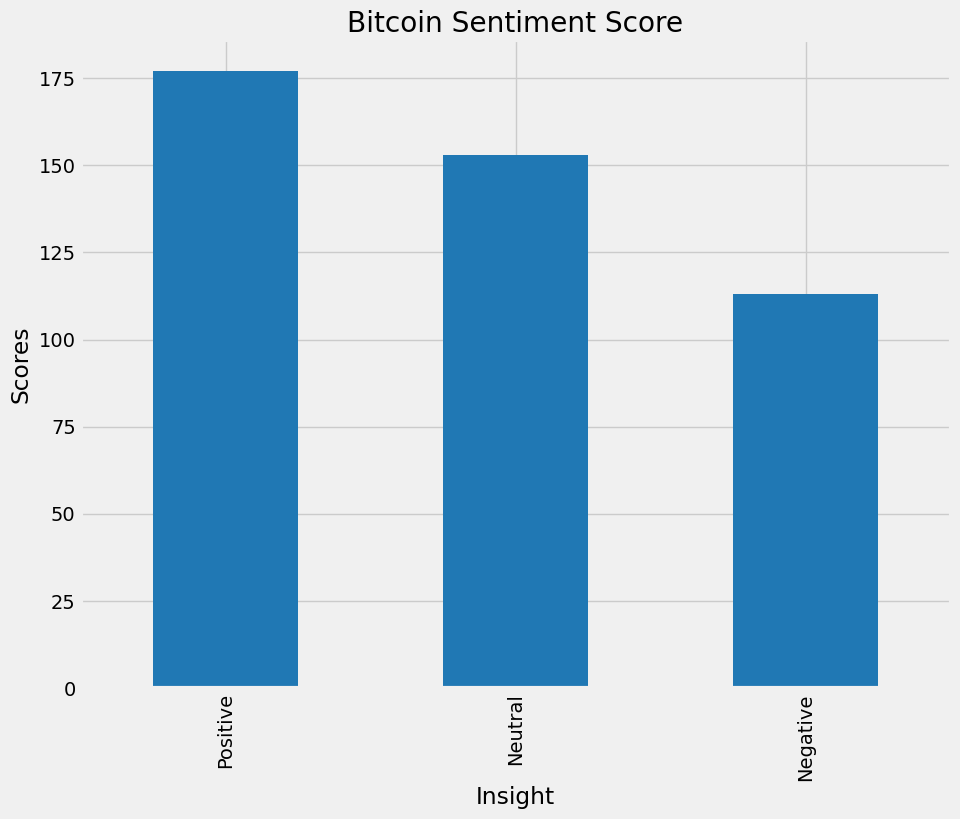

In [23]:
#Plot the values count of sentiment
plt.title("Bitcoin Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
MovieDetails_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

# Wordcloud

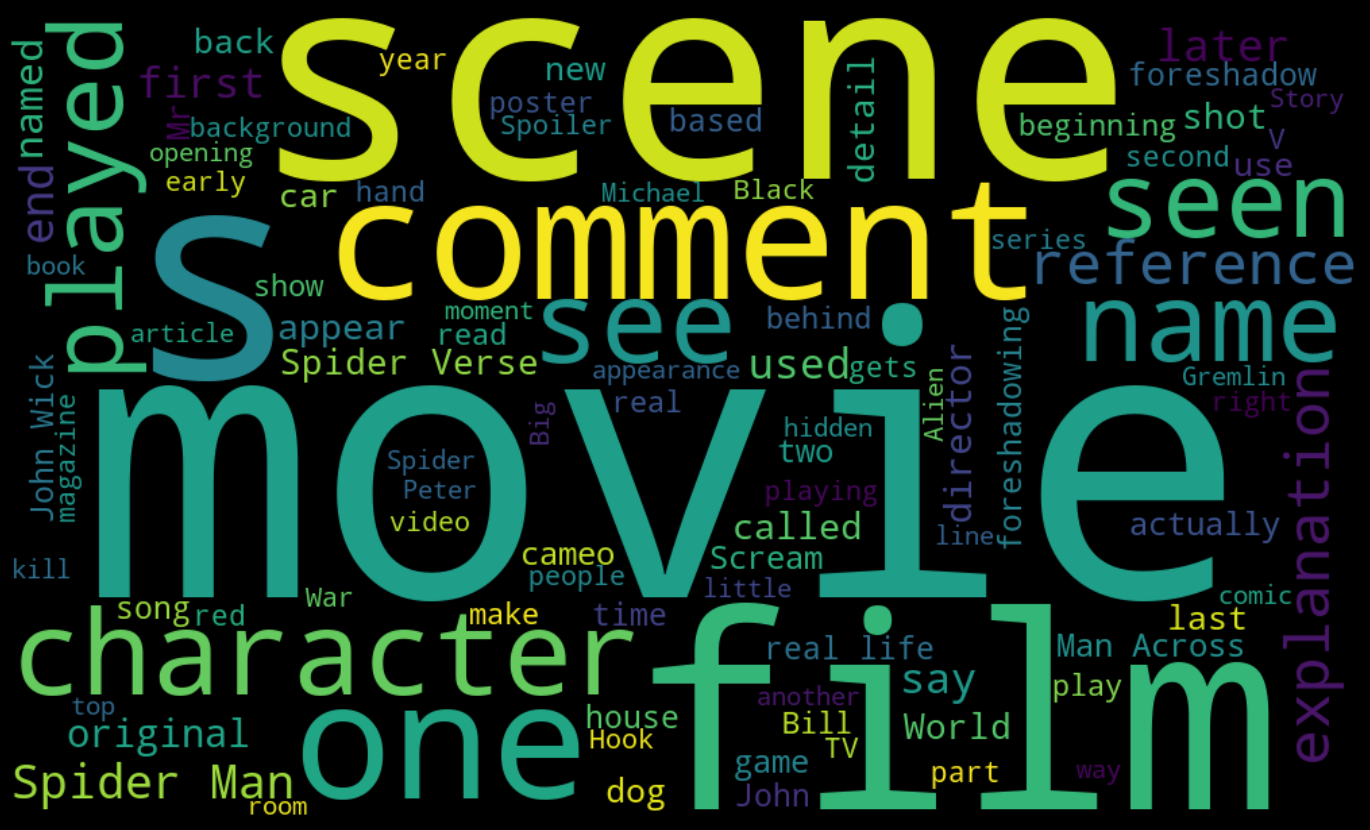

In [24]:
#Generating a word cloud visualization from the titles of Bitcoin-related articles.
text = ' '.join( [twts for twts in MovieDetails_df['Text']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");